## Codio Activity 2.6: Computing the Sample Covariance Matrix

**Expected Time: 45 Minutes**

**Total Points: 20**

This activity focuses on using covariance and correlation to understand the strength of relationships between two quantitative variables.  Also, you will use a heatmap to visualize these relationships.  Finally, you identify situations where correlation is not an appropriate measure based on the assumption of a linear variable.

## Index:

- [Problem 1](#Problem-1:-Calculating-Covariance)
- [Problem 2](#Problem-2:-Calculating-Correlation)
- [Problem 3](#Problem-3:-Heatmap-of-Covariance)
- [Problem 4](#Problem-4:-Heatmap-of-Correlation)
- [Problem 5](#Problem-5:-Strongest-Positive-Correlation)
- [Problem 6](#Problem-6:-Interpreting-negative-correlation)


### Covariance and Correlation

In probability theory and statistics, the mathematical concepts of covariance and correlation are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

If X and Y are two random variables, with means (expected values)  $\mu_X$ and  $\mu_Y$ and standard deviations  $σ_X$ and  $σ_Y$, respectively, then their covariance and correlation are as follows:

covariance $$\text{cov}_{XY}=\sigma_{XY}=E[(X-\mu_{X})\,(Y-\mu_{Y})]$$

correlation $$\text{corr}_{XY} = \rho_{XY} = E[(X - \mu_X)(Y - \mu_Y)]/(\sigma_X \sigma_Y)$$

so that

$$\rho_{XY}=\sigma_{XY}/(\sigma_{X} \sigma_{Y})$$


where E is the expected value operator. Notably, correlation is dimensionless while covariance is in units obtained by multiplying the units of the two variables. --[source](https://en.wikipedia.org/wiki/Covariance_and_correlation)

#### Dataset: Penguins

Our sample dataset comes from the `seaborn` visualization library and contains measurements of penguins of different species located on different islands.  Below, we load the data and display the first few rows and datatype information.

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [112]:
penguin_df = pd.read_csv('data/penguins.csv')

In [113]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [114]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


[Back to top](#Index:) 

### Problem 1: Calculating Covariance

**4 Points**

Pandas DataFrame's have a built in `.cov()` method that will return the covariation between each of the numeric features.  Use the `.cov()` method below to create the covariance matrix.  Assign your solution to the variable `penguins_cov` below.

In [115]:
### GRADED

penguins_cov = ''

### BEGIN SOLUTION
penguin_df = penguin_df.loc[::,['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_cov = penguin_df.cov()
### END SOLUTION
penguins_cov

,bill_depth_mm,bill_length_mm,flipper_length_mm,body_mass_g
bill_depth_mm,3.877888,-2.462091,-15.947248,-748.456122
bill_length_mm,-2.462091,29.906333,50.058195,2595.623304
flipper_length_mm,-15.947248,50.058195,196.441677,9852.191649
body_mass_g,-748.456122,2595.623304,9852.191649,648372.487699


<Axes: >

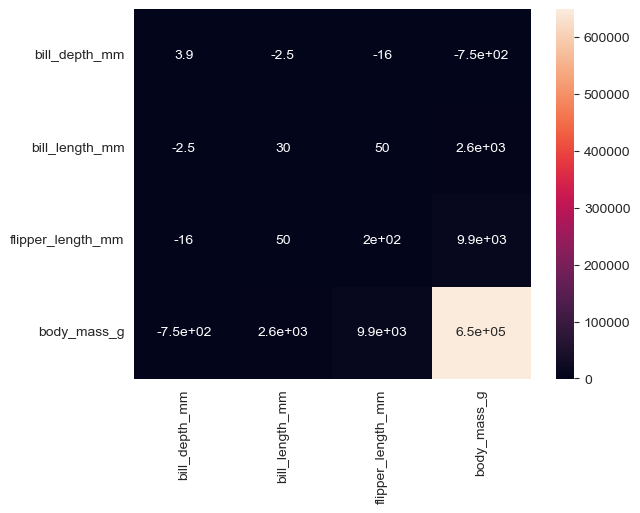

In [116]:
sns.heatmap(penguins_cov,annot=True)

In [117]:
### BEGIN HIDDEN TESTS
penguin_df_ = pd.read_csv('data/penguins.csv')
penguin_df_ = penguin_df_.loc[::,['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_cov_ = penguin_df_.cov()
pd.testing.assert_frame_equal(penguins_cov, penguins_cov_)
### END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 2: Calculating Correlation

**4 Points**

Similarly, pandas DataFrames have a built in `.corr()` method that computes the correlation matrix of the numeric columns.  Below, use the `.corr()` method on the `penguins_df` and assign your results to the variable `penguin_corr` below.

In [118]:
### GRADED

penguins_corr = ''

### BEGIN SOLUTION
penguin_df = penguin_df.loc[::,['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_corr = penguin_df.corr()
### END SOLUTION
penguins_corr

,bill_depth_mm,bill_length_mm,flipper_length_mm,body_mass_g
bill_depth_mm,1.000000,-0.228626,-0.577792,-0.472016
bill_length_mm,-0.228626,1.000000,0.653096,0.589451
flipper_length_mm,-0.577792,0.653096,1.000000,0.872979
body_mass_g,-0.472016,0.589451,0.872979,1.000000


In [119]:
### BEGIN HIDDEN TESTS
penguin_df_ = pd.read_csv('data/penguins.csv')
penguin_df_ = penguin_df_.loc[::,['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_corr_ = penguin_df_.corr()
pd.testing.assert_frame_equal(penguins_corr, penguins_corr_)
### END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 3: Heatmap of Covariance

**0 Points**

The covariance matrix can be visualized to color according to the strength of associations.  While `matplotlib` has a `.pcolor()` function that can do this, the `seaborn` heatmap is better suited for this visualization.  Use the `sns.heatmap()` function to visualize the covariance matrix.  Set the `annot` keyword argument to `True` so that the covariance values are displayed in the heatmap.

<Axes: >

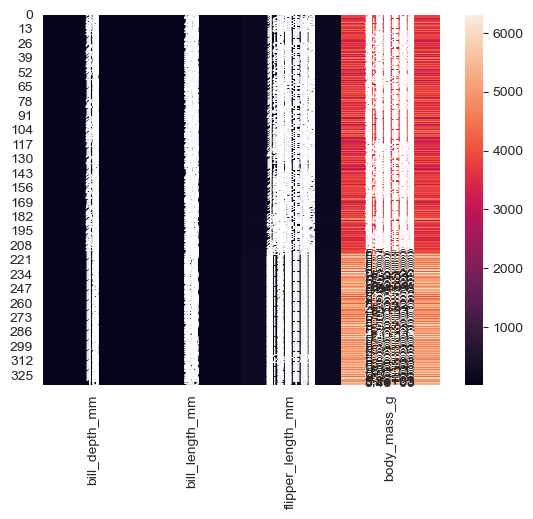

In [120]:
### GRADED

### BEGIN SOLUTION
sns.heatmap(penguin_df,annot=True)
### END SOLUTION

In [121]:
### BEGIN HIDDEN TESTS
assert 1 == 1
### END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 4: Heatmap of Correlation

**0 Points**

Again using `sns.heatmap()`, visualize the correlation matrix for the penguins data.  Set the `annot` argument to `True` again.

<Axes: >

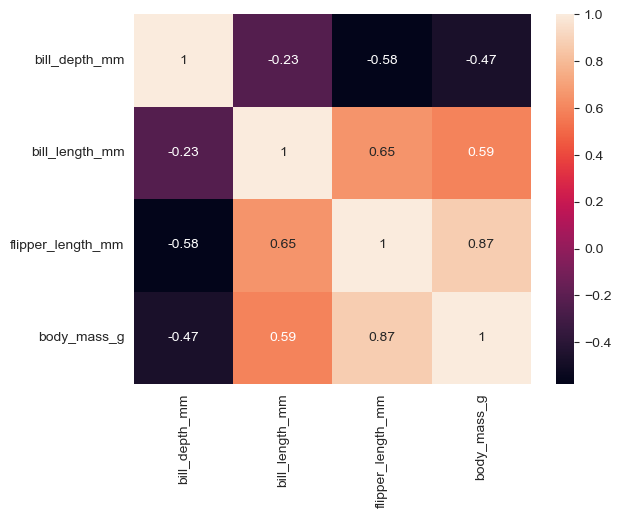

In [122]:
### GRADED

### BEGIN SOLUTION
penguin_df = penguin_df.loc[::,['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_corr = penguin_df.corr()
sns.heatmap(penguins_corr,annot=True)
### END SOLUTION

In [123]:
### BEGIN HIDDEN TESTS
assert 1 == 1, 'This is not graded.'
### END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 5: Strongest Positive Correlation

**8 Points**

What two features have the strongest positive correlation?  Enter your answer as a list of strings using the exact column names to `highest_pos_corr` below.

In [124]:
### GRADED

highest_pos_corr = ''

### BEGIN SOLUTION
highest_pos_corr = ['body_mass_g', 'flipper_length_mm']
### END SOLUTION

In [125]:
### BEGIN HIDDEN TESTS
highest_pos_corr_ = ['body_mass_g', 'flipper_length_mm']
assert set(highest_pos_corr_) == set(highest_pos_corr)
### END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 6: Interpreting negative correlation

**4 Points**

The correlation between `body_mass_g` and `bill_depth_mm` reads -0.47.  Complete the following sentence that interprets this correlation.

```
As body mass increases bill depth ___________
```

Assign your solution as a string -- either 'increases', 'decreases', or 'neither' to `ans_6` below.

In [126]:
### GRADED

ans_6 = ''

### BEGIN SOLUTION
ans_6 = 'decreases'
### END SOLUTION

In [127]:
### BEGIN HIDDEN TESTS
ans_6_ = 'decreases'
assert ans_6 == ans_6_
### END HIDDEN TESTS